## Graphs

In [1]:
# graphs_tutorial.py

# -------------------------------
# 🧠 WHAT IS A GRAPH?
# -------------------------------
# A graph is a collection of nodes (vertices) and connections between them (edges).
# Graphs can be:
# - Directed or Undirected (one-way or two-way edges)
# - Weighted or Unweighted (edges have cost or not)
# - Represented using:
#     - Adjacency List (dictionary of lists) ✅ preferred
#     - Adjacency Matrix (2D array)
#     - Edge List (list of tuples)

# Python is great for graph problems using dictionaries and sets/lists.

# -------------------------------
# Example 1: Graph Representation using Adjacency List
# -------------------------------

# Let's create an undirected graph:
# A -- B
# |    |
# C -- D

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C']
}

print("Example 1 - Adjacency List Graph:")
for node in graph:
    print(f"{node} -> {graph[node]}")


# -------------------------------
# Example 2: Depth-First Search (DFS) - Recursive
# -------------------------------

def dfs_recursive(graph, node, visited=None):
    if visited is None:
        visited = set()

    if node not in visited:
        print(node, end=" ")  # Visit node
        visited.add(node)

        for neighbor in graph[node]:
            dfs_recursive(graph, neighbor, visited)

print("\n\nExample 2 - DFS Recursive:")
dfs_recursive(graph, 'A')  # Output: A B D C (or other variations)


# -------------------------------
# Example 3: Breadth-First Search (BFS)
# -------------------------------

from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)

print("\n\nExample 3 - BFS:")
bfs(graph, 'A')  # Output: A B C D (or similar)


# -------------------------------
# Example 4: Detect Cycle in Undirected Graph
# -------------------------------

def has_cycle(graph):
    visited = set()

    def dfs(node, parent):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs(neighbor, node):
                    return True
            elif neighbor != parent:
                return True
        return False

    for node in graph:
        if node not in visited:
            if dfs(node, None):
                return True
    return False

print("\n\nExample 4 - Detect Cycle:")
print("Has cycle?", has_cycle(graph))  # True


# -------------------------------
# Example 5: Topological Sort (for Directed Acyclic Graph - DAG)
# -------------------------------

def topological_sort(graph):
    visited = set()
    stack = []

    def dfs(node):
        visited.add(node)
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor)
        stack.append(node)

    for node in graph:
        if node not in visited:
            dfs(node)

    return stack[::-1]  # reverse to get correct order

# DAG:
dag = {
    '5': ['2', '0'],
    '4': ['0', '1'],
    '2': ['3'],
    '3': ['1'],
    '0': [],
    '1': []
}

print("\nExample 5 - Topological Sort:")
print(topological_sort(dag))  # One valid output: ['4', '5', '2', '3', '1', '0']


# -------------------------------
# Summary
# -------------------------------
# Graph Terminology:
# - Vertex (Node): Individual element
# - Edge: Connection between nodes
# - Path: Sequence of edges
# - Cycle: Path that starts and ends at the same node
# - Connected Graph: Path exists between every pair
# - DAG: Directed Acyclic Graph

# Useful Graph Algorithms:
# ✅ DFS / BFS
# ✅ Topological Sort
# ✅ Cycle Detection
# ✅ Dijkstra’s Algorithm (Shortest Path)
# ✅ Union-Find (for disjoint sets)

# Python Tips:
# - Use defaultdict(list) for dynamic graph
# - Use sets to track visited nodes
# - Use deque for efficient queue operations in BFS


Example 1 - Adjacency List Graph:
A -> ['B', 'C']
B -> ['A', 'D']
C -> ['A', 'D']
D -> ['B', 'C']


Example 2 - DFS Recursive:
A B D C 

Example 3 - BFS:
A B C D 

Example 4 - Detect Cycle:
Has cycle? True

Example 5 - Topological Sort:
['4', '5', '0', '2', '3', '1']


In [2]:
#Time complexity:# - DFS/BFS: O(V + E) where V is vertices and E is edges

# Space complexity: V + E

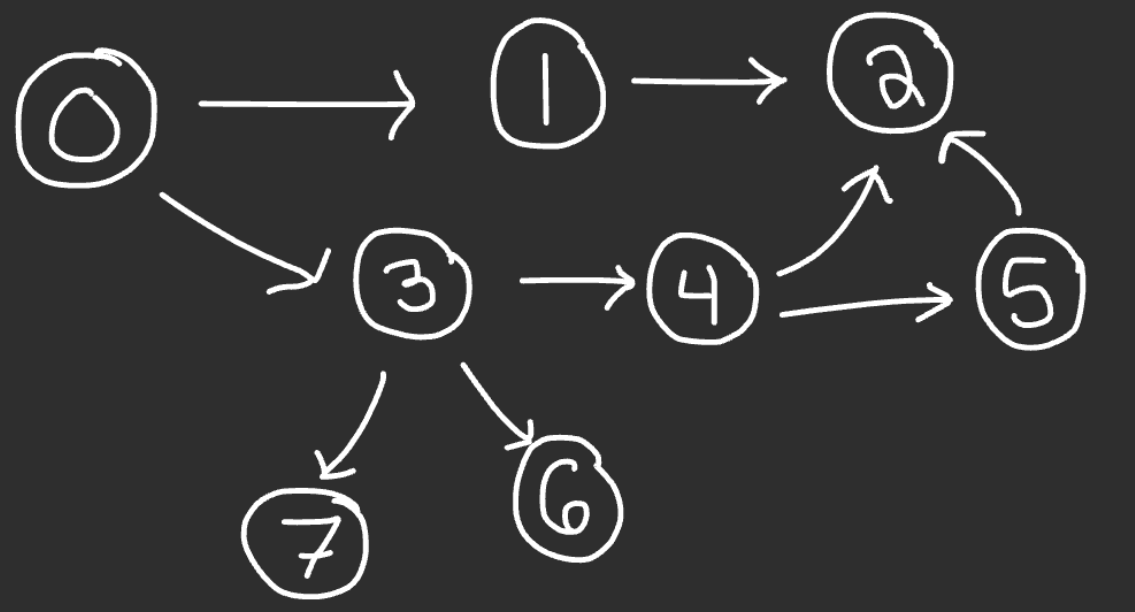

In [3]:
# Array of Edges (Directed) [Start, End]
n = 8
A = [[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

A

[[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

In [4]:
# Convert Array of Edges -> Adjacency Matrix

M = []
for i in range(n):
  M.append([0] * n)

for u, v in A:
  M[u][v] = 1

  # Uncomment the following line if the graph is undirected
  # M[v][u] = 1

M

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [5]:
# Convert Array of Edges -> Adjacency List
from collections import defaultdict

D = defaultdict(list)

for u, v in A:
  D[u].append(v)
  # Uncomment the following line if the graph is undirected
  # D[v].append(u)

D

defaultdict(list, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [2, 5], 5: [2]})

In [6]:
D[3]

[4, 6, 7]

In [7]:
# DFS with Recursion - O(V + E) where V is the number of nodes and E is the number of edges

def dfs_recursive(node):
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      dfs_recursive(nei_node)

source = 0
seen = set()
seen.add(source)
dfs_recursive(source)

0
1
2
3
4
5
6
7


In [8]:
# Iterative DFS with Stack - O(V + E)

source = 0

seen = set()
seen.add(source)
stack = [source]

while stack:
  node = stack.pop()
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      stack.append(nei_node)

0
3
7
6
4
5
2
1


In [9]:
# BFS (Queue) - O(V + E)

source = 0

from collections import deque

seen = set()
seen.add(source)
q = deque()
q.append(source)

while q:
  node = q.popleft()
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      q.append(nei_node)

0
1
3
2
4
6
7
5


In [ ]:
class Node:
  def __init__(self, value):
    self.value = value
    self.neighbors = []

  def __str__(self):
    return f'Node({self.value})'

  def display(self):
    connections = [node.value for node in self.neighbors]
    return f'{self.value} is connected to: {connections}'

A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')

A.neighbors.append(B)
B.neighbors.append(A)
C.neighbors.append(D)
D.neighbors.append(C)

B.display()

"B is connected to: ['A']"